# Data Analytics Project: Bike Sharing

## Defining the Business Question

- Question 1: What is the average wind speed in each season?
- question 2: What is the average weather in each season?

## Menyiapkan semua library yang dibutuhkan

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Data Wrangling

### Gathering Data

In [93]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

#### Menilai tabel `day_df`

In [94]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [95]:
day_df.isna().sum()
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("\n")
day_df.isnull().sum()
print("Data Null:\n", day_df.isnull().sum())

Jumlah duplikasi:  0


Data Null:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [96]:
# print("Data Describe:\n", day_df.describe(include='all'))
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

#### Membersihkan tabel `day_df`

In [97]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Membersihkan masalah kesalahan tipe data pada `day_df`

In [98]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [99]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [100]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [101]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "yr": ["max", "min", "mean", "std"]
})

instant  yr                        
       nunique max min      mean       std
season                                    
1          181   1   0  0.502762  0.501379
2          184   1   0  0.500000  0.501364
3          188   1   0  0.500000  0.501335
4          178   1   0  0.500000  0.501410

In [102]:
day_df.groupby(by="season").instant.nunique().sort_values(ascending=True)

season
4    178
1    181
2    184
3    188
Name: instant, dtype: int64

In [103]:
day_df.groupby(by="weekday").instant.nunique().sort_values(ascending=False)

weekday
0    105
1    105
6    105
2    104
3    104
4    104
5    104
Name: instant, dtype: int64

In [104]:
day_df.groupby(by="holiday").instant.nunique().sort_values(ascending=False)

holiday
0    710
1     21
Name: instant, dtype: int64

In [105]:
day_df.groupby(by="windspeed").agg({
    "instant": "nunique",
    "yr": ["max", "min", "mean", "std"]
})

instant  yr             
          nunique max min mean std
windspeed                         
0.022392        1   0   0  0.0 NaN
0.042304        1   0   0  0.0 NaN
0.045404        1   0   0  0.0 NaN
0.045408        1   0   0  0.0 NaN
0.046650        1   1   1  1.0 NaN
...           ...  ..  ..  ...  ..
0.417908        1   0   0  0.0 NaN
0.421642        1   1   1  1.0 NaN
0.422275        1   0   0  0.0 NaN
0.441563        1   1   1  1.0 NaN
0.507463        1   0   0  0.0 NaN

[650 rows x 5 columns]

In [106]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "windspeed": "mean"
}).sort_values(by="windspeed", ascending=False)

,instant,windspeed
season,,
1,181,0.214537
2,184,0.203507
3,188,0.172095
4,178,0.171995


In [107]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "weathersit": "mean"
}).sort_values(by="weathersit", ascending=True)

,instant,weathersit
season,,
3,188,1.297872
2,184,1.402174
1,181,1.408840
4,178,1.477528


## Visualization & Explanatory Analysis

In [108]:
day_df.replace({
    "season": {1: 'Dingin', 2: 'Semi', 3: 'Panas', 4: 'Gugur'},
}, inplace=True)

### Pertanyaan 1: Berapa rata rata kecepatan angin setiap musim?

In [109]:
windspeed_mean = day_df.groupby(by="season").agg({
    "windspeed": "mean"
}).sort_values(by="windspeed", ascending=True).reset_index()

print(windspeed_mean)

   season  windspeed
0   Gugur   0.171995
1   Panas   0.172095
2    Semi   0.203507
3  Dingin   0.214537


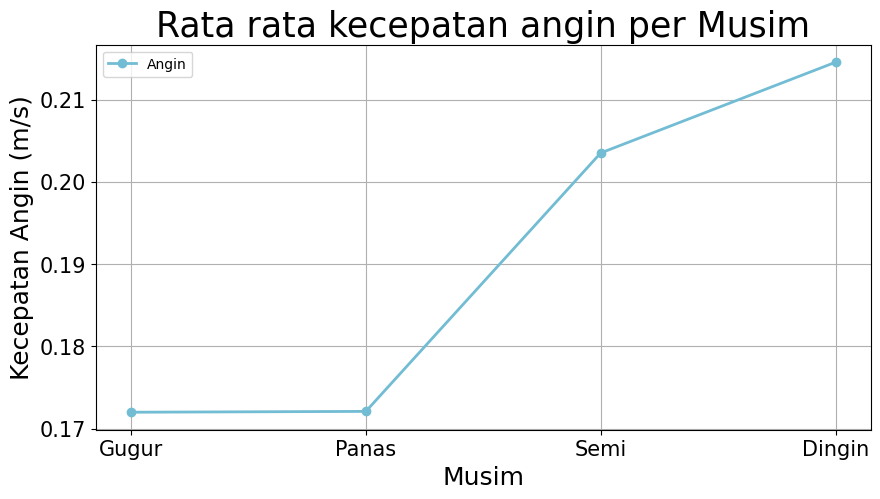

In [110]:
plt.figure(figsize=(10,5))
plt.plot(
    windspeed_mean['season'],
    windspeed_mean["windspeed"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Rata rata kecepatan angin per Musim", loc="center", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Musim', fontsize=18)
plt.ylabel('Kecepatan Angin (m/s)', fontsize=18)
plt.legend(['Angin'])
plt.grid()
plt.show()


### Pertanyaan 2: Berapa rata rata cuaca setiap musim?

In [111]:
weathersit_mean = day_df.groupby(by="season").agg({
    "weathersit": "mean"
}).sort_values(by="weathersit", ascending=True).reset_index()

print(weathersit_mean)

   season  weathersit
0   Panas    1.297872
1    Semi    1.402174
2  Dingin    1.408840
3   Gugur    1.477528


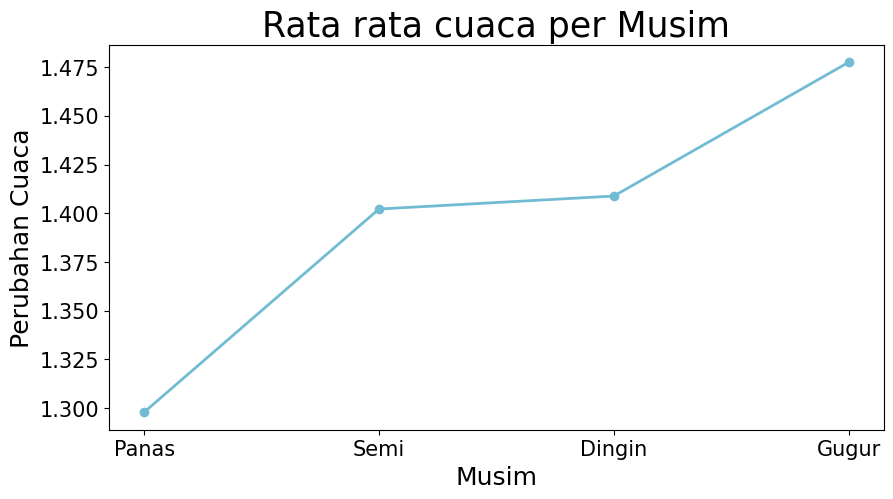

In [112]:
plt.figure(figsize=(10,5))
plt.plot(
    weathersit_mean['season'],
    weathersit_mean["weathersit"],
    marker='o',
    linewidth=2,
    color="#72BCD3"
)
plt.title("Rata rata cuaca per Musim", loc="center", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Musim', fontsize = 18)
plt.ylabel('Perubahan Cuaca', fontsize = 18)
plt.show()

## Conclusion

- Conclution pertanyaan 1: Dari pertanyaan 1, yakni
rata - rata kecepatan angin pada musim gugur adalah 0.171995,
rata - rata kecepatan angin pada musim dingin adalah 0.214537,
rata - rata kecepatan angin pada musim semi adalah 0.203507,
rata - rata kecepatan angin pada musim panas adalah 0.172095,

- conclution pertanyaan 2: Dari pertanyaan 2, yakni
rata - rata cuaca pada musim gugur adalah 1.477528,
rata - rata cuaca pada musim dingin adalah 1.408840,
rata - rata cuaca pada musim semi adalah 1.402174,
rata - rata cuaca pada musim panas adalah 1.297872,

In [113]:
# day_df.to_csv("main_data.csv", index=False)